In [14]:
# Paths so we can import both the root-level helper and the local misc
from pathlib import Path
import sys
import numpy as np

CWD = Path.cwd()  # lab_value_iteration/
ROOT = CWD.parent
if str(ROOT) not in sys.path: sys.path.append(str(ROOT))
if str(CWD) not in sys.path: sys.path.append(str(CWD))

from lab_value_iteration.helper import make_env, QLParams, run_q_learning_experiment, q_to_v, greedy_policy_from_q
from lab_value_iteration import misc  # local misc.py

# Q-Learning Integration

In [15]:
# Map/env settings — keep consistent with your MC notebooks when comparing
MAP_SIZE = 11
P_FROZEN = 0.85
SEED = 69

# Two envs: one for training (fast), one for pretty rendering/plots if needed
env_train = make_env(is_slippery=False, map_size=MAP_SIZE, proba_frozen=P_FROZEN, seed=SEED, render_mode=None)
env_viz   = make_env(is_slippery=False, map_size=MAP_SIZE, proba_frozen=P_FROZEN, seed=SEED, render_mode="rgb_array")

# Q-learning hyperparameters
ql_params = QLParams(
    episodes=25000,
    max_steps=200,
    alpha=0.1,
    gamma=0.99,
    epsilon_start=1.0,
    epsilon_min=0.05,
    epsilon_decay=0.999,
    seed=SEED,
    savefig_folder="figures"
)


## Train Q-learning agent

In [16]:
qtable, rewards_q, lengths_q = run_q_learning_experiment(env_train, ql_params)
V_q = q_to_v(qtable)
policy_q = greedy_policy_from_q(qtable)


## Visualize Q-learning results

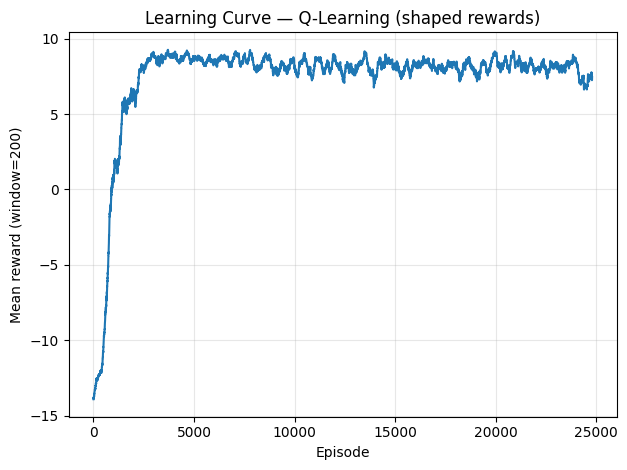

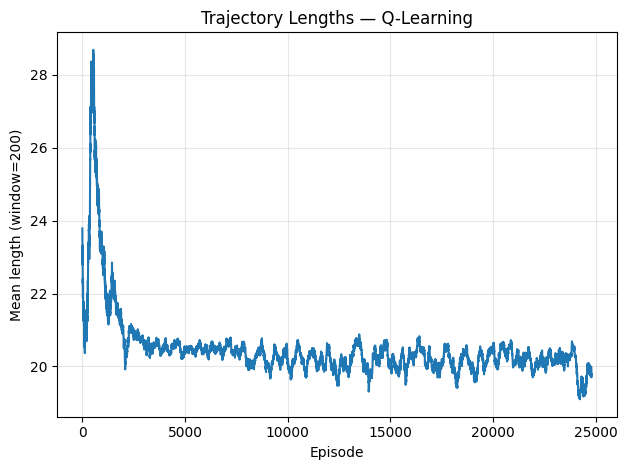

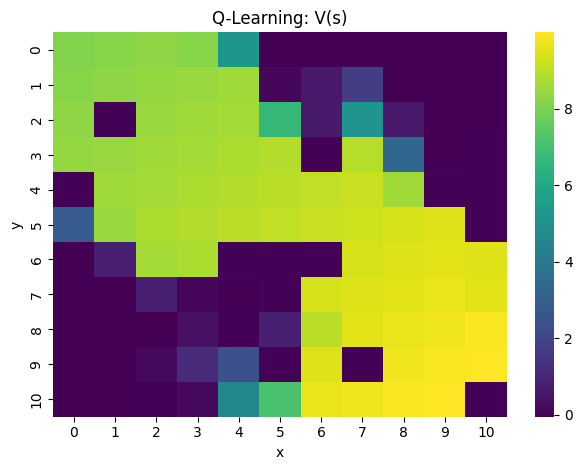

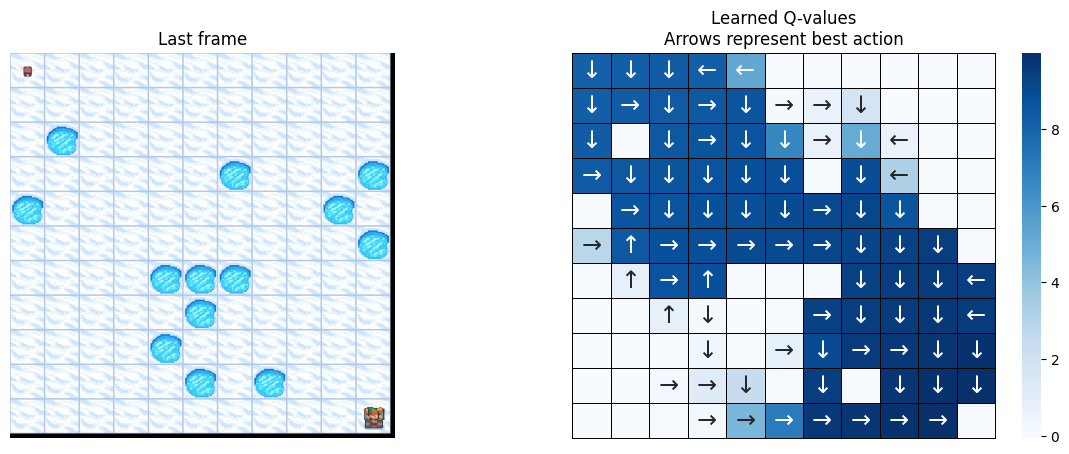

In [13]:
# Learning curve (reward vs episodes)
misc.plot_learning_curve(rewards_q, label="Q-Learning (shaped rewards)", smooth=200)

# Trajectory lengths vs episodes
misc.plot_lengths_curve(lengths_q, label="Q-Learning", smooth=200)

# Value function from Q (V(s) = max_a Q)
misc.plot_value_heatmap(V_q, MAP_SIZE, title="Q-Learning: V(s)")

state, _ = env_viz.reset(seed=SEED)  # <-- REQUIRED before .render()
last_frame = env_viz.render()        # now valid

# rollout to the end using greedy policy from Q
policy = np.argmax(qtable, axis=1)
for _ in range(ql_params.max_steps):
    a = int(policy[state])
    state, _, terminated, truncated, _ = env_viz.step(a)
    last_frame = env_viz.render()
    if terminated or truncated:
        break

# now plot
misc.plot_q_values_map(qtable, env_viz, MAP_SIZE, params=ql_params, img_label="Q-Learning")
